In [1]:
x = [1,2,3,4,5]

In [2]:
def f(y):
    print(y)

In [4]:
f(3)

3


In [5]:
y

NameError: name 'y' is not defined

In [6]:
f(x)

[1, 2, 3, 4, 5]


In [7]:
def f(y):
    print(x)

In [8]:
f(3)

[1, 2, 3, 4, 5]


In [9]:
def f(x):
    print(x)

In [10]:
f(3)

3


In [11]:
x

[1, 2, 3, 4, 5]

In [12]:
y = [i**2 for i in x]
y

[1, 4, 9, 16, 25]

In [13]:
y = []
for i in x:
    y.append(i**2)
y

[1, 4, 9, 16, 25]

In [14]:
%pwd

'/home/explorer/BMS270/Notebooks'

In [15]:
%cd ../data/

/home/explorer/BMS270/data


In [16]:
!ls

GSE88801_kallisto_TPMs_thresh10.cdt  sample_table.csv  SRR7541452.6M.fastq.gz


In [17]:
from csv import reader, excel_tab

In [19]:
orfs = []
names = []
data = []
fp = reader(open("GSE88801_kallisto_TPMs_thresh10.cdt"),dialect=excel_tab)
header = next(fp)
for row in fp:
    orfs.append(row[0])
    names.append(row[1])
    d = []
    for col in row[2:]:
        d.append(float(col))
    data.append(d)

In [20]:
len(orfs),len(names),len(data)

(9939, 9939, 9939)

In [21]:
len(data[0])

36

In [22]:
print(data[0])

[6.362550367427176, 6.727814970645067, 5.933769484723882, 6.324633855252411, 6.300011673343996, 6.459424077257147, 6.377834837091959, 6.303301109319118, 6.415947237367395, 6.2040371993842145, 6.530726874373919, 6.266216094983205, 6.393225244921796, 6.453224368240938, 6.594934102465421, 6.5445476712839925, 6.994021522245025, 6.571406961935287, 7.392274493375117, 7.44675991054851, 7.753084209066774, 7.977082169126867, 7.786213029758888, 7.705710549943006, 7.43057097325026, 7.52388064668888, 7.801612997259689, 8.034651247248537, 7.239582395795018, 8.016029021943783, 7.347024653690205, 7.612796416014002, 7.6544356196138885, 7.760881187689698, 7.461089453549775, 7.8056366735095875]


In [23]:
data[0][0]

6.362550367427176

In [26]:
%cd ../Notebooks/

/home/explorer/BMS270/Notebooks


In [27]:
from stats import pearson

In [28]:
pearson(data[0],data[1])

0.3575573504856398

In [29]:
orfs[0]

'ENSMUSG00000028180'

In [30]:
orfs[1]

'ENSMUSG00000028184'

In [31]:
pearson(data[0],data[2])

0.9280099952535318

In [32]:
header

['ORF',
 'NAME',
 'BMDM_Live_1_4h',
 'BMDM_Live_1_24h',
 'BMDM_Live_2_4h',
 'BMDM_Live_2_24h',
 'BMDM_Live_3_4h',
 'BMDM_Live_3_24h',
 'BMDM_Dead_1_4h',
 'BMDM_Dead_1_24h',
 'BMDM_Dead_2_4h',
 'BMDM_Dead_2_24h',
 'BMDM_Dead_3_4h',
 'BMDM_Dead_3_24h',
 'BMDM_uninfected_1_4h',
 'BMDM_uninfected_1_24h',
 'BMDM_uninfected_2_4h',
 'BMDM_uninfected_2_24h',
 'BMDM_uninfected_3_4h',
 'BMDM_uninfected_3_24h',
 'J774_Live_1_4h',
 'J774_Live_1_24h',
 'J774_Live_2_4h',
 'J774_Live_2_24h',
 'J774_Live_3_4h',
 'J774_Live_3_24h',
 'J774_Dead_1_4h',
 'J774_Dead_1_24h',
 'J774_Dead_2_4h',
 'J774_Dead_2_24h',
 'J774_Dead_3_4h',
 'J774_Dead_3_24h',
 'J774_uninfected_1_4h',
 'J774_uninfected_1_24h',
 'J774_uninfected_2_4h',
 'J774_uninfected_2_24h',
 'J774_uninfected_3_4h',
 'J774_uninfected_3_24h']

In [33]:
data[0][0]

6.362550367427176

In [34]:
data[0][2]

5.933769484723882

In [36]:
col1 = []
col2 = []
for row in data:
    col1.append(row[0])
    col2.append(row[2])
pearson(col1,col2)

0.9750047486027237

In [37]:
col1 = []
col2 = []
for row in data:
    col1.append(row[0])
    col2.append(row[1])
pearson(col1,col2)

0.921762783376668

In [40]:
def colpearson(data,c1,c2):
    col1 = []
    col2 = []
    for row in data:
        col1.append(row[c1])
        col2.append(row[c2])
    return pearson(col1,col2)

In [41]:
colpearson(data,0,2)

0.9750047486027237

In [43]:
header = header[2:]

In [44]:
header[0],header[2]

('BMDM_Live_1_4h', 'BMDM_Live_2_4h')

In [45]:
colpearson(data,0,1)

0.921762783376668

In [46]:
%matplotlib nbagg
import matplotlib.pyplot as plt

In [47]:
sdata1 = data[:10]

In [48]:
from random import seed, sample

In [49]:
seed(42)

In [50]:
sdata2 = sample(data,10)

In [51]:
n = sample(range(len(data)),10)
sdata2 = []
sorfs2 = []
for i in n:
    sdata2.append(data[i])
    sorfs2.append(orfs[i])

In [52]:
sorfs2

['ENSMUSG00000030946',
 'ENSMUSG00000015536',
 'ENSMUSG00000073982',
 'ENSMUSG00000098643',
 'ENSMUSG00000039187',
 'ENSMUSG00000073412',
 'ENSMUSG00000045316',
 'ENSMUSG00000002748',
 'ENSMUSG00000020921',
 'ENSMUSG00000043415']

In [55]:
def transpose(M):
    T = []
    for col in range(len(M[0])):
        Trow = []
        for row in M:
            Trow.append(row[col])
        T.append(Trow)
    return T

<IPython.core.display.Javascript object>


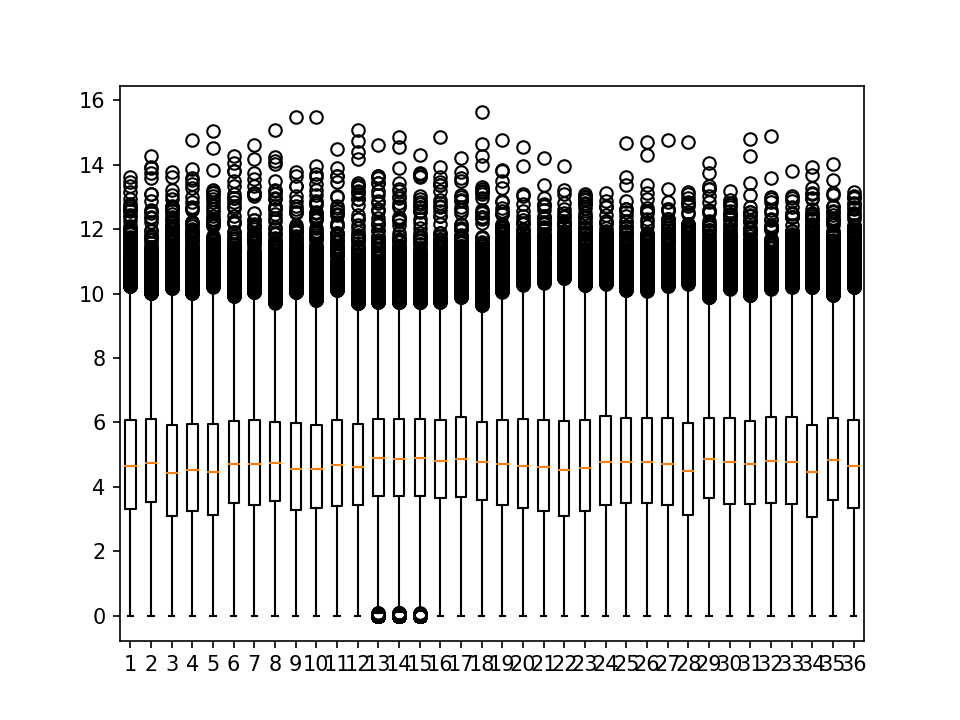

In [56]:
fig = plt.figure()
b = plt.boxplot(transpose(data))

<IPython.core.display.Javascript object>


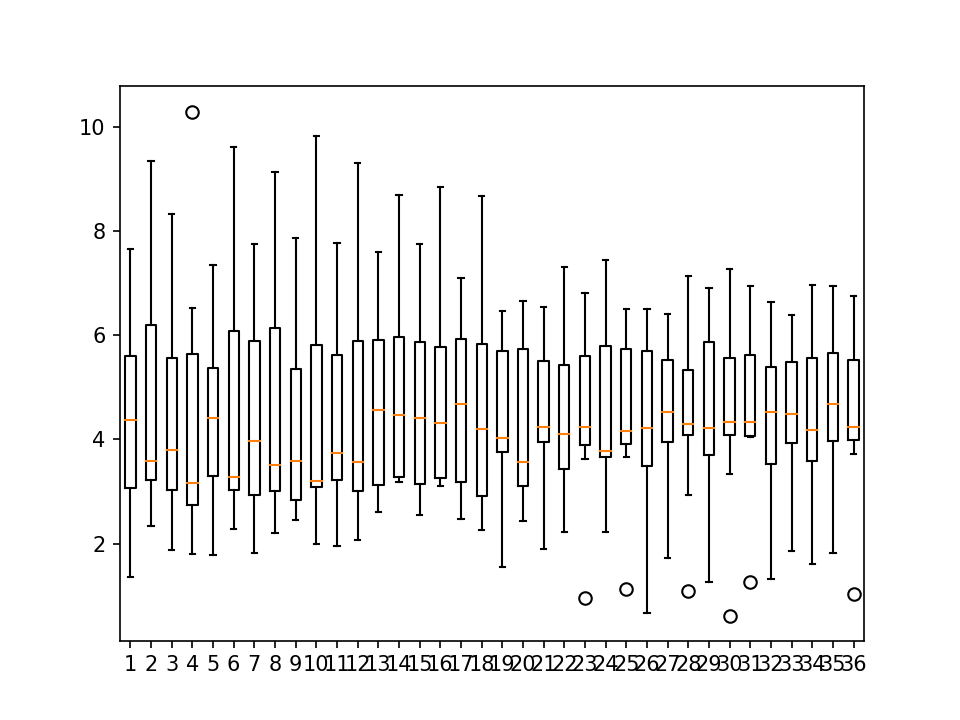

In [57]:
fig = plt.figure()
b = plt.boxplot(transpose(sdata2))